## Problem Statement 

BoomBikes, a US bike-sharing service provider, has experienced significant revenue declines due to the COVID-19 pandemic. To recover and thrive post-lockdown, the company aims to analyze factors influencing the demand for shared bikes. By leveraging a large dataset of daily bike usage and external factors, they seek to identify significant variables affecting demand and their predictive power. 

This analysis will help BoomBikes develop a strategic plan to address customer needs and outperform competitors in the market.

## Importing required libraries

In [78]:
# To Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Import supporting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Data understanding, preparation and EDA

#### Importing and Understanding Data

In [80]:
# Read the dataSet in form of csv file

dataSet = pd.read_csv('day.csv')

In [81]:
# Looking at the first five rows
dataSet.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [82]:
# checking number of rows and columns in dataset

dataSet.shape
## there are 730 rows, and 16 columns

(730, 16)

In [83]:
# Validating Data types for each columns and presence of null values
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
# specifically validating for presence of null values
dataSet.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [85]:
# checkings for outliers by comparing 50% and max values
dataSet.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Preparation

In [86]:
# dropping the duplicate rows

dataSet.drop_duplicates(inplace=True)

In [87]:
# checking the shape after dropping duplicate rows
dataSet.shape

(730, 16)

##### We can conclude that there was no duplicate rows in dataset

-----

##### Dropping columns thats are not useful for analysis
##### mainly there are 4 colums we can drop
- instant (Since this just indicated row number)
- dteday (date-day column is already a consolidated duplicate for coulmuns yr and mnth, and we are not interested in day of the month for this analysis as it only increases the dummy variables and less impact on target Count (domain knowledge))
- casual (This is already part of target variable Cnt)
- registered (This is already part of target variable Cnt)

In [88]:
# dropping the above discussed columns in place 
dataSet.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [89]:
# checking the shape after dropping unnecesarry columns
dataSet.shape

(730, 12)

In [90]:
# Checking columns in dataset
dataSet.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [91]:
#Checking unique values in each column
dataSet.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64


##### From above data and using data dictionary it clearly indicates the columns - season, yr , mnth, weekday, holiday, workingday and weathersit are all categorical variables,
 out of which values for season,mnth, weekday and weathersit need to mapped to right categorical values

In [92]:
#changing numeric to meaningful categorical values 
dataSet.season = dataSet.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

dataSet.weathersit = dataSet.weathersit.map({1:'Clear',2:'Mist',3:'LightSnowRain',4:'HeavySnowRain'})

dataSet.mnth = dataSet.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'})

dataSet.weekday = dataSet.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### since temp,atemp, hum and windspeed is numerical variables we can check for outlies by plotting box plots

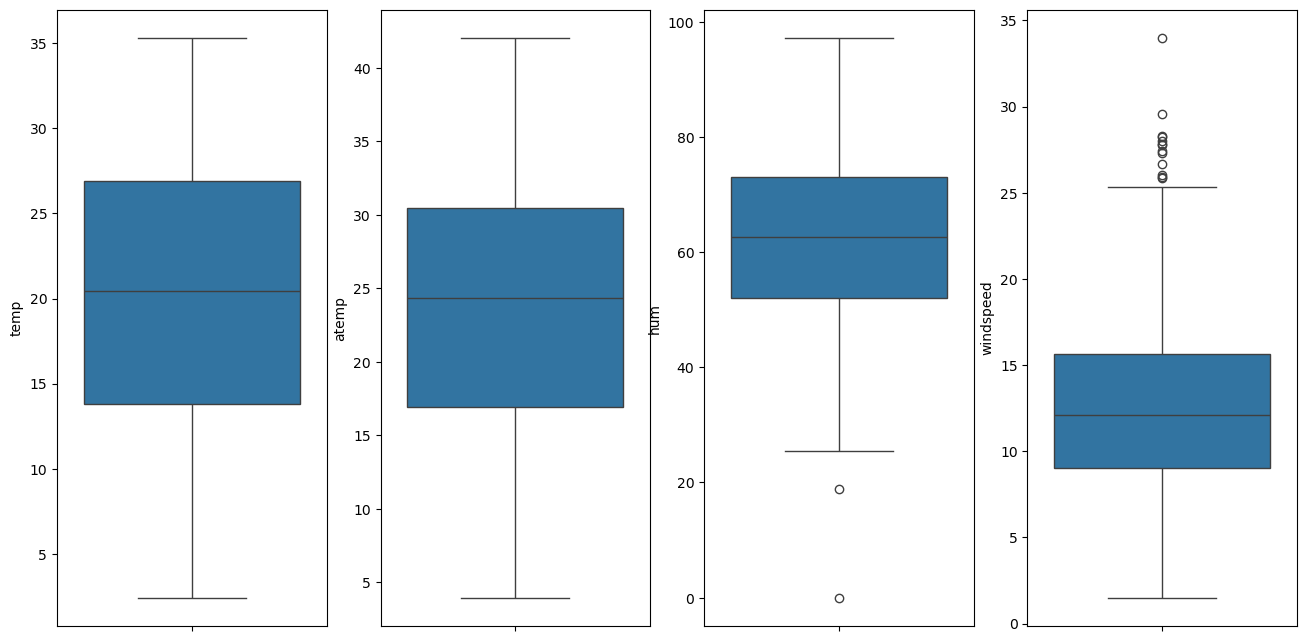

In [93]:
plt.figure(figsize=(16,8))
plt.subplot(1,4,1)
sns.boxplot(data = dataSet, y="temp")
plt.subplot(1,4,2)
sns.boxplot(data = dataSet, y="atemp")
plt.subplot(1,4,3)
sns.boxplot(data = dataSet, y="hum")
plt.subplot(1,4,4)
sns.boxplot(data = dataSet, y="windspeed")
plt.show()

##### Clearly there is no ouliers for temp,atemp, hum


In [94]:
# Checking the gap between max value and upper limit for winspeed column
np.max(dataSet["windspeed"])-(np.percentile(dataSet["windspeed"],75)+(np.percentile(dataSet["windspeed"],75)-np.percentile(dataSet["windspeed"],25))*1.5)

8.498522874999995

##### However for winspeed the outliers can be ignores since the gap between max value and upper limit is just 8.5 

#### EDA / Data Visualisation

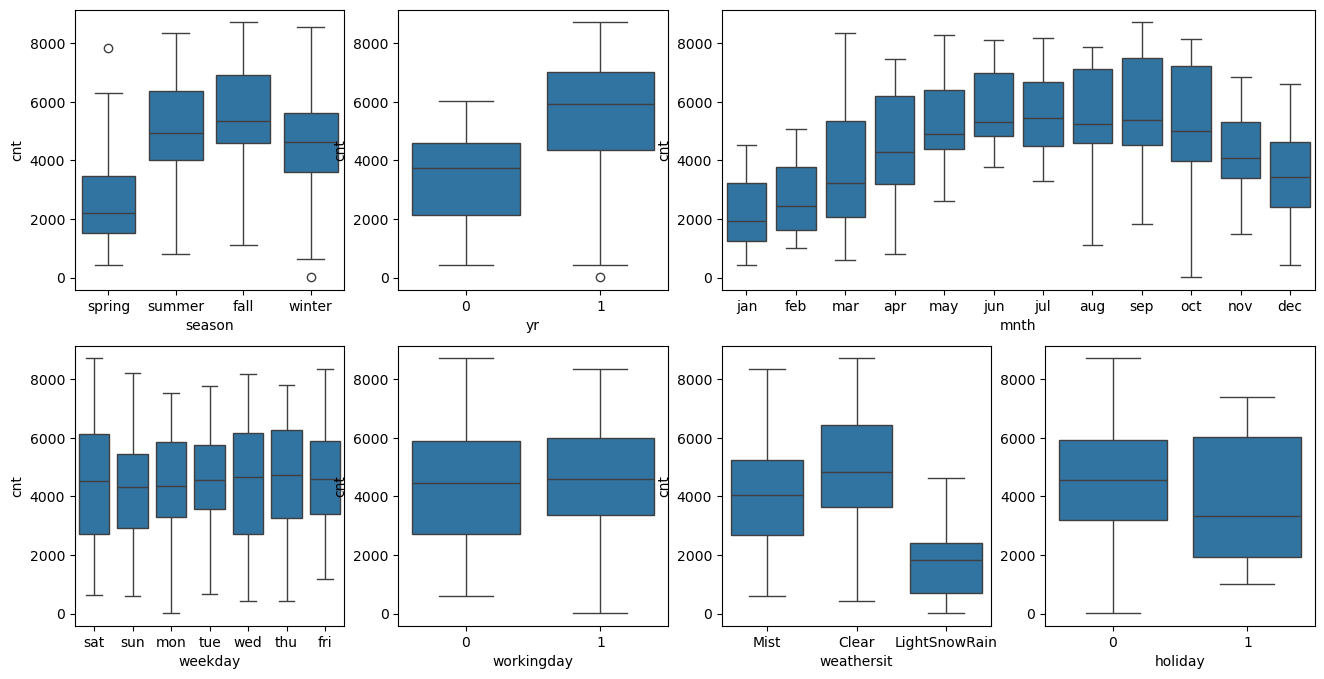

In [95]:
# Comaparing how the categorical variables trend with respect to target variable 'cnt'
plt.figure(figsize=(16, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataSet)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dataSet)
plt.subplot(2,4,(3,4))
sns.boxplot(x = 'mnth', y = 'cnt', data = dataSet)
plt.subplot(2,4,8)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataSet)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataSet)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataSet)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataSet)
plt.show()

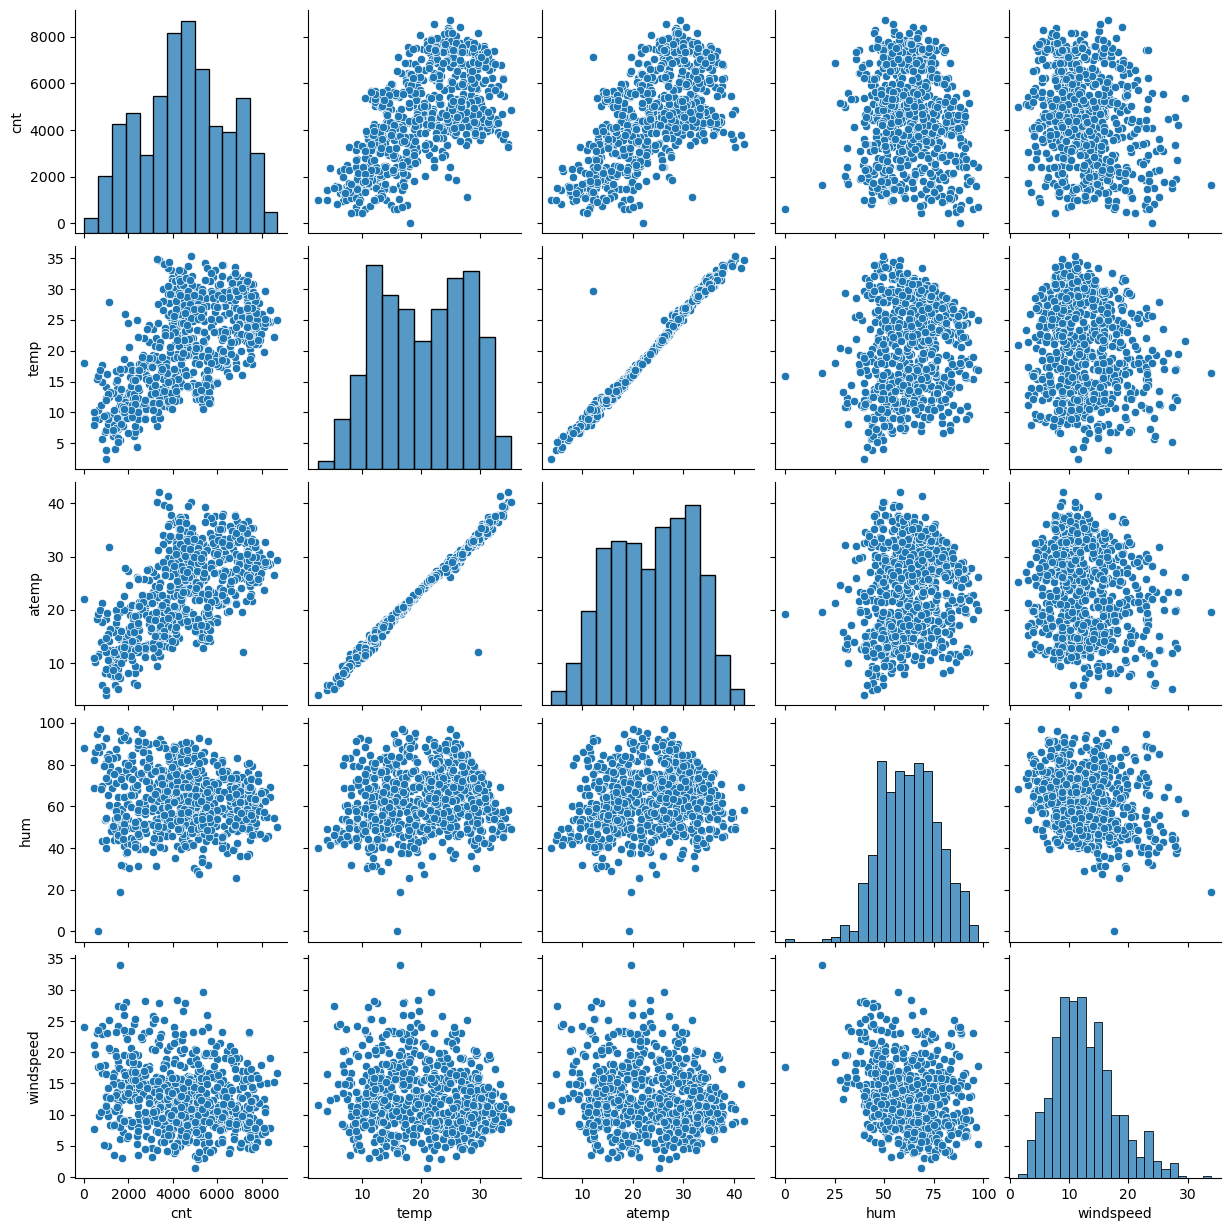

In [96]:
# Checking linear relationship between numerical variables
sns.pairplot(data=dataSet,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

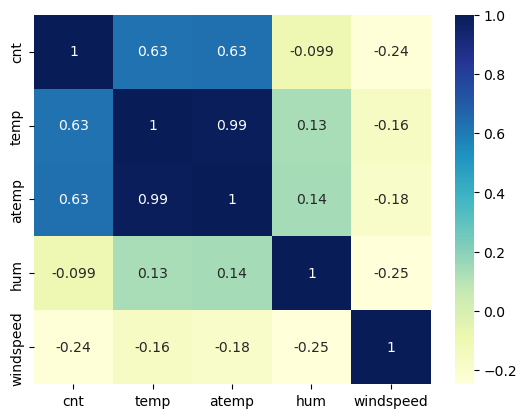

In [97]:
# plotting heatmap among numerical variables in terms of correlation score
sns.heatmap(dataSet[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Now lets explore all other dependent variable against target variable and check the pattern in respect to year 2018 and 2019

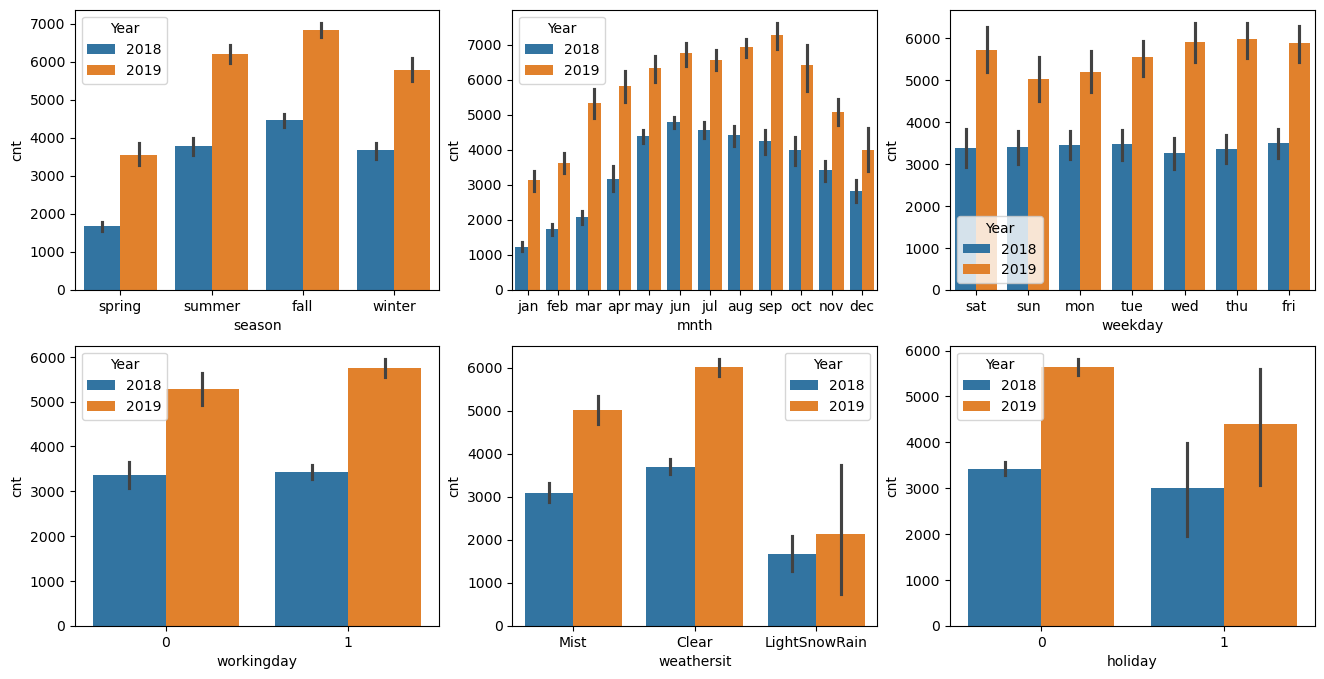

In [98]:
## Exploring all the categorical variable against target Variable 'Cnt' with including year as  3rd dimension 
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.barplot(x='season',y='cnt',data=dataSet, hue='yr')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,3,2)
sns.barplot(x='mnth',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,3,3)
sns.barplot(x='weekday',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,3,4)
sns.barplot(x='workingday',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,3,5)
sns.barplot(x='weathersit',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,3,6)
sns.barplot(x='holiday',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.show()

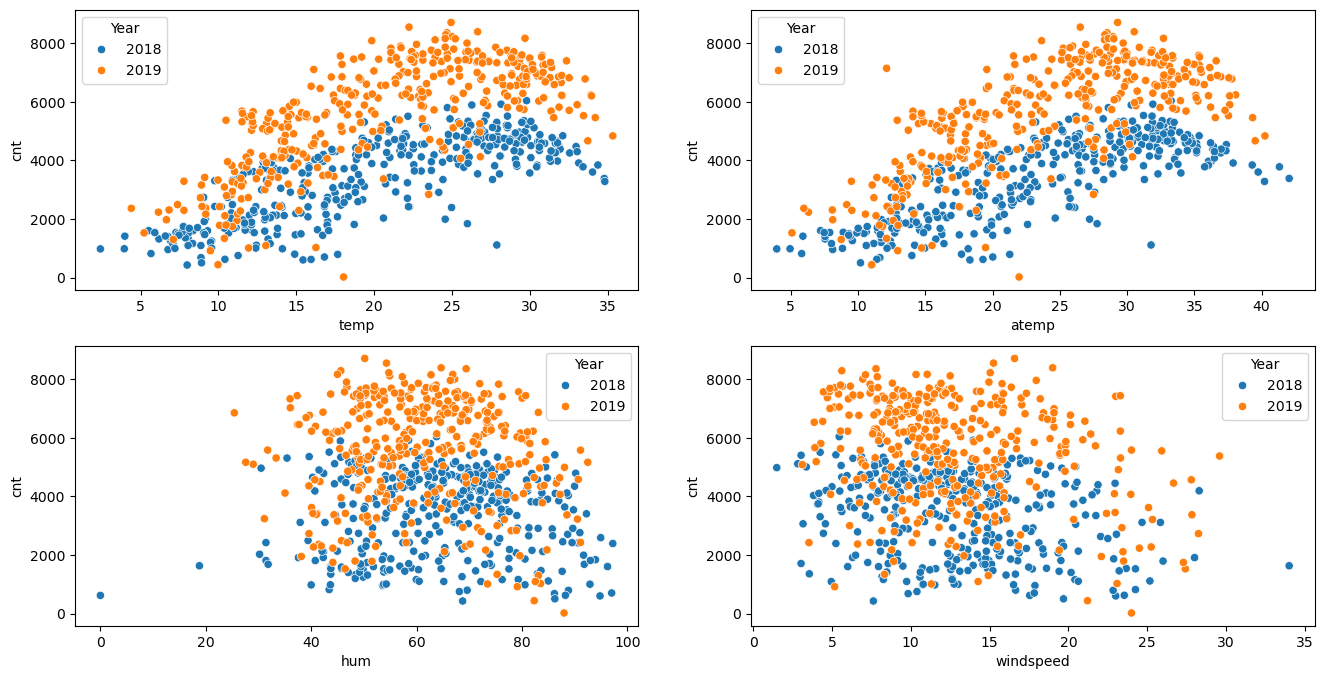

In [99]:
## Exploring all the numerical variable against target Variable 'Cnt' with including 'year' as  3rd dimension 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(x='temp',y='cnt',data=dataSet, hue='yr')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,2,2)
sns.scatterplot(x='atemp',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,2,3)
sns.scatterplot(x='hum',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.subplot(2,2,4)
sns.scatterplot(x='windspeed',y='cnt',data=dataSet, hue='yr')
plt.legend(handles, ['2018', '2019'], title="Year")
plt.show()

#### Clearly the sales for Year 2019 is increased compared to 2018

## Data Preparation
#### Creating Dummy variables

In [100]:
# Dummy variable creation for mnth, weekday, weathersit and season variables as these have more than 2 values as categorical.

season_dv=pd.get_dummies(dataSet.season,drop_first=True,dtype=int)
mnth_dv=pd.get_dummies(dataSet.mnth,drop_first=True,dtype=int)
weekday_dv=pd.get_dummies(dataSet.weekday,drop_first=True,dtype=int)
weathersit_dv=pd.get_dummies(dataSet.weathersit,drop_first=True,dtype=int)

In [101]:
# Concatinating dummy variable with main dataset
dataSet = pd.concat([dataSet,season_dv,mnth_dv,weekday_dv,weathersit_dv],axis=1)

In [102]:
# checking the data set
dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnowRain,Mist
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [103]:
# dropping columns mnth, weekday, weathersit and season as dummy variables is already created
dataSet.drop(['mnth','weekday','weathersit','season'], axis = 1, inplace = True)

In [104]:
# checking the number of rows and columns
dataSet.shape

(730, 30)

In [105]:
# checking the columns
dataSet.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'LightSnowRain', 'Mist'],
      dtype='object')

## Splitting data into train and test data

In [106]:
# splitting the data-set into train and test set
trainSet,testSet = train_test_split(dataSet,train_size=0.7,random_state=42)

In [107]:
# checking the shape traing dataset rows and columns
trainSet.shape

(510, 30)

In [108]:
# checking the shape test dataset rows and columns
testSet.shape

(220, 30)

#### Rescaling the Features
##### We will use MinMax scaling.

In [109]:
scaler = MinMaxScaler()

In [110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

trainSet[num_vars] = scaler.fit_transform(trainSet[num_vars])

trainSet.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnowRain,Mist
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,1,0,0,0,0,0,0,1,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,1,0,0,0,0,1,0,0,1


In [111]:
# validating if all the scaled variables are withing 0 and 1
trainSet[['temp','atemp','hum','windspeed','cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.551313,0.526919,0.654203,0.415045,0.497429
std,0.227237,0.212992,0.143788,0.185760,0.234207
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354526,0.354454,0.544033,0.281934,0.344772
50%,0.575824,0.564951,0.660798,0.384737,0.501871
75%,0.745338,0.698389,0.756977,0.526489,0.677080
max,1.000000,1.000000,1.000000,1.000000,1.000000


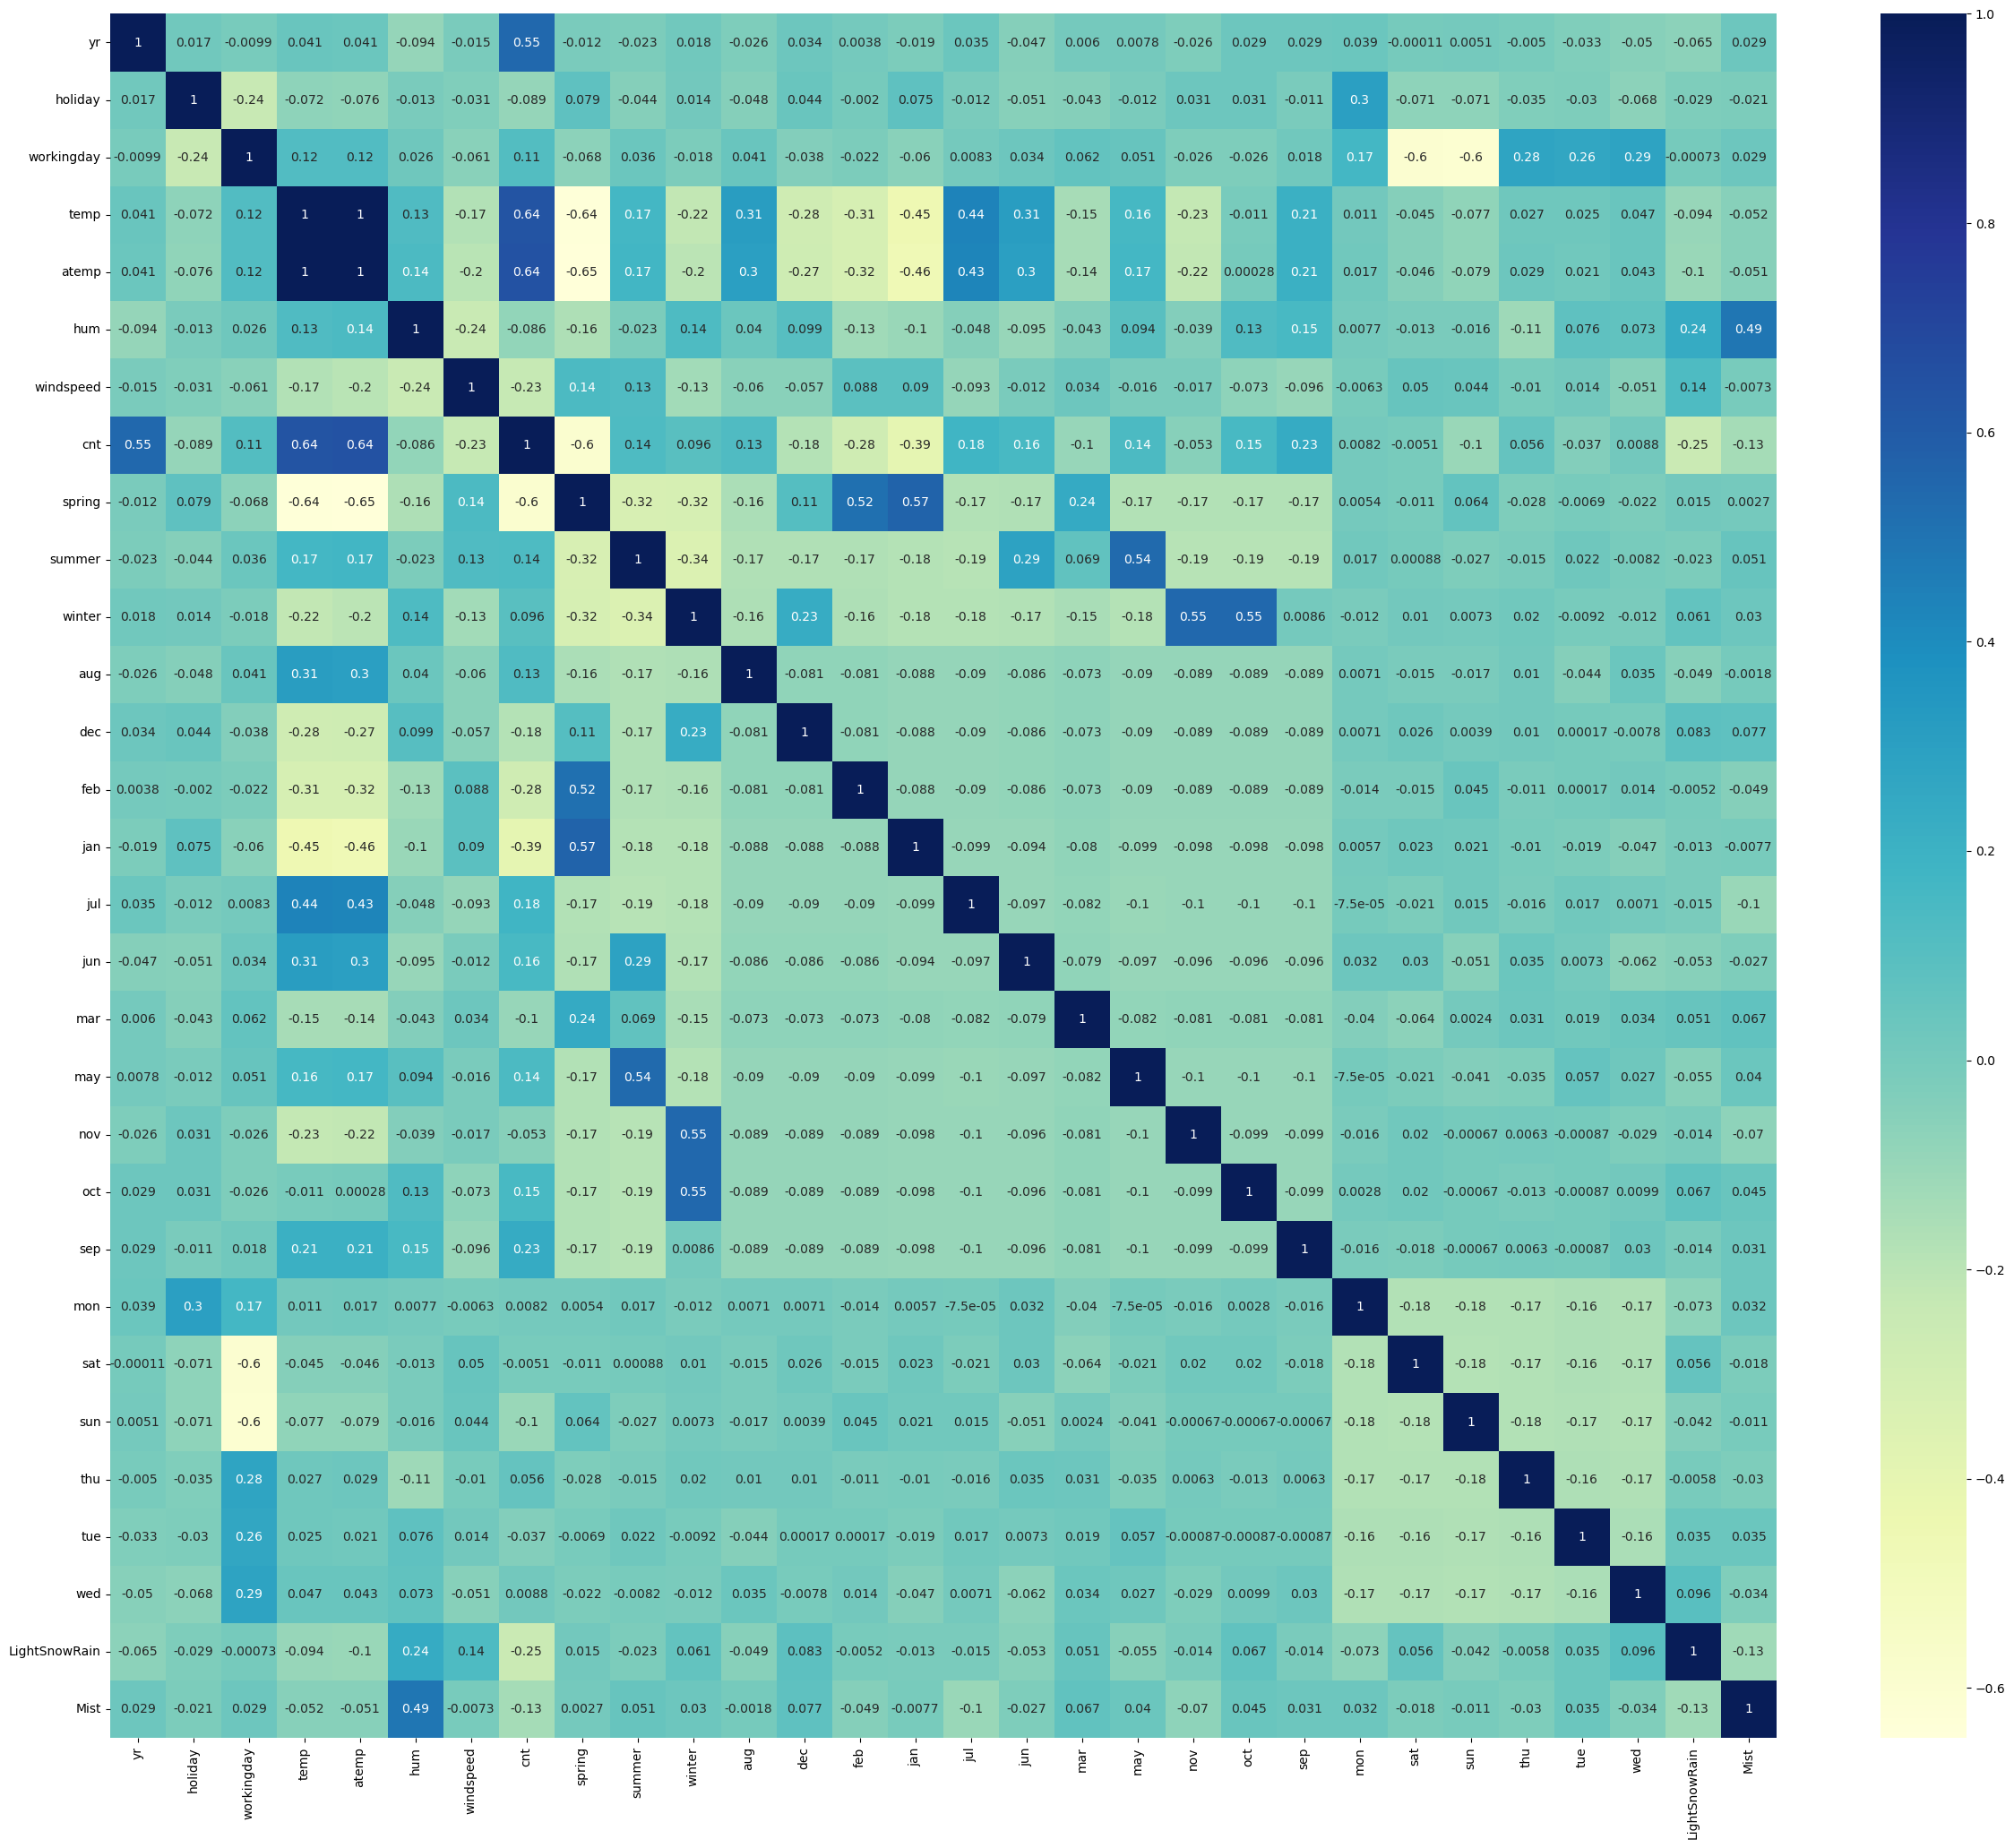

In [112]:
## Checking corelation score for all the variables in train dataset
plt.figure(figsize=(30,25))
sns.heatmap(trainSet.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### We can clearly observe that temp and atemp are highly corelated and Cnt has high co-relation with temp,atemp and yr,likewise winter is related to nov and oct, summer is related to may, spring is related to jan and feb and hum is related to mist 

## Dividing into X and Y sets for the model building

In [113]:
y_train = trainSet.pop('cnt')
X_Train = trainSet

In [114]:
# checking shape
print(y_train.shape)
print(X_Train.shape)

(510,)
(510, 29)


## Building Linear Regression Model

We will be using automated approach RFE to select the most important features from a dataset to train the model

In [115]:
# building linear regression model
lr = LinearRegression()
lr.fit(X_Train, y_train)

LinearRegression()

In [116]:
#Reduce the number of features to 15 using an automated method
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_Train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [117]:
# Checking what columns are selected by RFE
list(zip(X_Train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', False, 3),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', False, 2),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 8),
 ('wed', False, 12),
 ('LightSnowRain', True, 1),
 ('Mist', True, 1)]

In [118]:
X_Train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'jul', 'nov', 'sat', 'sun', 'LightSnowRain', 'Mist'],
      dtype='object')

In [119]:
# checking columns rejected by RFE
X_Train.columns[~rfe.support_]

Index(['temp', 'summer', 'aug', 'feb', 'jan', 'jun', 'mar', 'may', 'oct',
       'sep', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

## To further eliminate the less important columns(variables) lets build model using statsmodel for detail statistics

In [120]:
# preparing columns to train the model
col = X_Train.columns[rfe.support_]

In [121]:
# preparing training set to train the model
X_Train_rfe=X_Train[col]

In [122]:
# checking shape of training set after RFE
X_Train_rfe.shape

(510, 15)

In [123]:
X_Train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,dec,jul,nov,sat,sun,LightSnowRain,Mist
645,1,1,0,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,1
163,0,0,1,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0
360,0,0,1,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,1
640,1,0,1,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,1
625,1,0,1,0.637937,0.899098,0.839562,0,0,0,0,0,0,0,0,1


In [124]:
#  a function which can be called to build Linear regression model using statsmodel , this is helpful to buil model repeatedly
#  after eliminating each unwanted independent variable

def buildLR(col):
    X_Train_stats = sm.add_constant(X_Train[col])
    lr_using_stats = sm.OLS(y_train,X_Train_stats).fit()
    print(lr_using_stats.summary())
    return lr_using_stats


In [125]:
#  a function to calculate VFI for given column list

def calculateVFI(col):
    X_Train_vif = X_Train[col]
    VIF_df = pd.DataFrame()
    VIF_df['Feautures'] = X_Train_vif.columns
    VIF_df['VIF'] = [variance_inflation_factor(X_Train_vif.values, i) for i in range(X_Train_vif.shape[1])]
    VIF_df['VIF'] = round(VIF_df['VIF'],2)
    print(VIF_df.sort_values(by='VIF',ascending=False))



## Model -1

In [126]:
model = buildLR(col)
print("-"*90)
calculateVFI(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.99e-185
Time:                        13:21:59   Log-Likelihood:                 481.60
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     495   BIC:                            -869.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2478      0.030      8.326

In [127]:
# since workingday has very high VIF value > 5, let eliminate this column
col= col.drop('workingday')

## Model -2

In [128]:
model = buildLR(col)
print("-"*90)
calculateVFI(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.99e-185
Time:                        13:21:59   Log-Likelihood:                 481.60
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     495   BIC:                            -869.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3378      0.037      9.156

In [129]:
# since hum has very high VIF value > 5, let eliminate this column
col=col.drop('hum')

## Model -3

In [130]:
model = buildLR(col)
print("-"*90)
calculateVFI(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.65e-183
Time:                        13:21:59   Log-Likelihood:                 474.29
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     496   BIC:                            -861.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2515      0.029      8.543

In [131]:
# since sat has very high VIF value > 5, let eliminate this column
col = col.drop('windspeed')

## Model - 4

In [132]:
model = buildLR(col)
print("-"*90)
calculateVFI(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          7.33e-182
Time:                        13:21:59   Log-Likelihood:                 467.61
No. Observations:                 510   AIC:                            -909.2
Df Residuals:                     497   BIC:                            -854.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1978      0.026      7.680

In [133]:
# since sat has very high P value > 0.05, let eliminate this column
col = col.drop('sat')

## Model -5

In [134]:
model = buildLR(col)
print("-"*90)
calculateVFI(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.05e-183
Time:                        13:21:59   Log-Likelihood:                 467.57
No. Observations:                 510   AIC:                            -911.1
Df Residuals:                     498   BIC:                            -860.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1990      0.025      7.839

#### we Can choose the 5TH Model, as it appears that the predictors exhibit minimal multicollinearity, and the p-values for all predictors seem to be significant, also F-statistic is 219.6 and Prob (F-statistic): 5.05e-183 which is nearly 0, indicating overall model is significant


## Residual Analysis

In [135]:
y_train_pred = model.predict(sm.add_constant(X_Train[col]))

Text(0.5, 0, 'Errors')

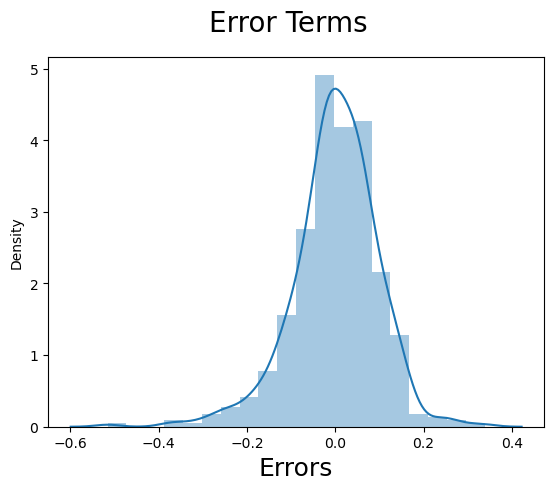

In [136]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                        

#### From above graph we can observe clearly that error terms are uniformly distributed

#### plotting a graph for 'error terms' vs 'y' to see if there is any pattern

Text(0, 0.5, 'Error')

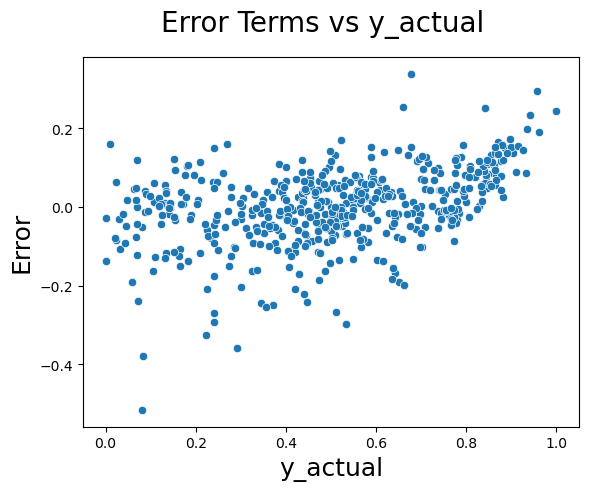

In [137]:
fig = plt.figure()
sns.scatterplot(y=(y_train - y_train_pred),x=y_train)
fig.suptitle('Error Terms vs y_actual', fontsize = 20)                 
plt.xlabel('y_actual', fontsize = 18) 
plt.ylabel('Error', fontsize = 18) 

#### From above graph we can observe clearly that error terms are distributed randomly , indiacating error terms are independent of each other

## Actual vs Predicted

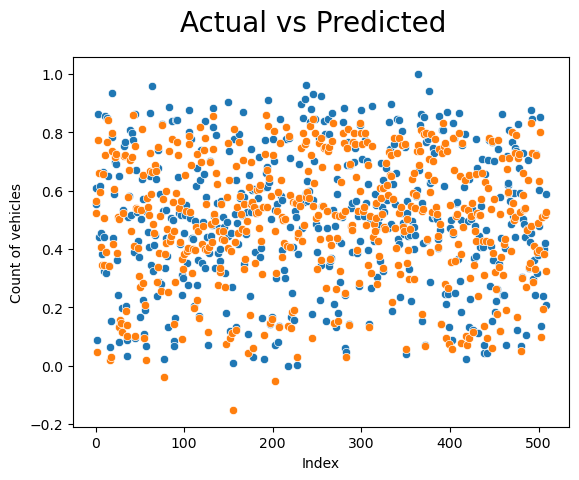

In [138]:

sns.scatterplot(x=range(y_train.shape[0]),y=y_train)
sns.scatterplot(y=y_train_pred,x=range(y_train_pred.shape[0]))
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Count of vehicles')
plt.show()

Text(0, 0.5, 'y_train_pred')

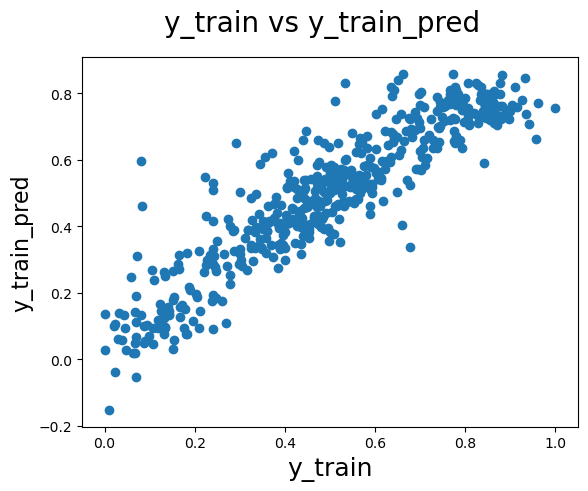

In [139]:
# Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)  

#### R-Squared value for train predictions

In [140]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8290530254987682

## Model predictions

In [141]:
# Scaling test data
num_vars = ['temp','atemp','hum','windspeed','cnt']

testSet[num_vars] = scaler.transform(testSet[num_vars])

testSet.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnowRain,Mist
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,1,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,0,0,0,0,1,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,1,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,0,0,0,0,1,0,0,0,0


In [142]:
# validating if scaling is done
testSet[['temp','atemp','hum','windspeed','cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.526557,0.500943,0.629591,0.435018,0.480125
std,0.229808,0.215606,0.152237,0.212390,0.232713
min,0.047675,0.051010,0.193646,0.060760,-0.049378
25%,0.324018,0.314694,0.521081,0.281540,0.287849
50%,0.505733,0.494075,0.609274,0.414837,0.472957
75%,0.725609,0.684248,0.734893,0.533519,0.639291
max,0.970925,0.939531,1.002146,1.214955,0.980804


In [143]:
#seperating target column
y_test = testSet.pop('cnt')
X_Test = testSet

In [144]:
## using model to predict on test data
y_test_pred = model.predict(sm.add_constant(X_Test[col]))

#### R-Squared value for test predictions

In [145]:
#Print R-squared Value
r2_score(y_test,y_test_pred)

0.8137555042377649

## Model Evaluation

#### R-Squared value for Test predictions

In [146]:
#evaluating the model using r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8137555042377649

Text(0, 0.5, 'y_pred')

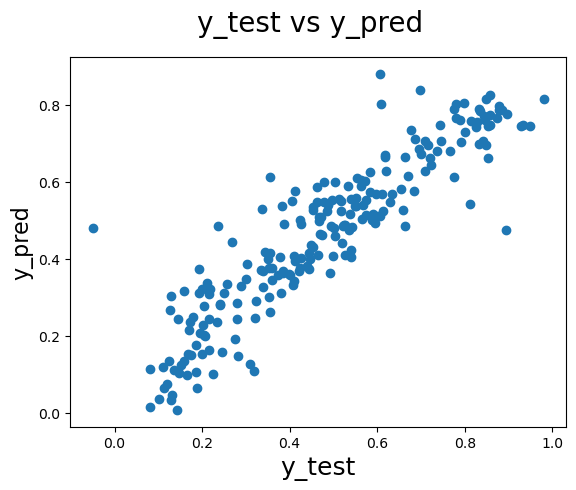

In [147]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

In [148]:
# checking what facter's are significant to predint demand for shared bisked
model.params

const            0.198999
yr               0.242879
holiday         -0.078865
atemp            0.471677
spring          -0.149310
winter           0.094111
dec             -0.072590
jul             -0.060872
nov             -0.093560
sun             -0.043696
LightSnowRain   -0.279030
Mist            -0.083120
dtype: float64

In [149]:
# rounding to 2 decimal places
round(model.params,2)

const            0.20
yr               0.24
holiday         -0.08
atemp            0.47
spring          -0.15
winter           0.09
dec             -0.07
jul             -0.06
nov             -0.09
sun             -0.04
LightSnowRain   -0.28
Mist            -0.08
dtype: float64

#### Hence the equation of our best fitted line is:
$cnt = 0.20 + 0.24 * yr - 0.08 * holiday + 0.47 * atemp-0.15* spring+0.09*winter-0.07*dec-0.06*jul-0.09*nov-0.04*sun-0.28*LightSnowRain-0.08*Mist$

In [150]:
# writing function to calculate adjusted rsquare
def getAdjusterRsquare(r2,n,p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [151]:
#get adjusted rsquare for test data
getAdjusterRsquare(r2_score(y_test,y_test_pred),X_Test[col].shape[0],X_Test[col].shape[1])

0.8039060357118775

In [152]:
#get adjusted rsquare for train data
getAdjusterRsquare(r2_score(y_train,y_train_pred),X_Train[col].shape[0],X_Train[col].shape[1])

0.82527708831099

## Conclusion

#### Significant variables to predict the demand for shared bikes
- yr (year)
- holiday
- atemp (or temp)
- season (spring,winter) 
- months (dec,jul, nov )
- weekday (sunday/sun)
- weathersit (LightSnowRain,Mist)
  

## Models summary :
- Train dataset R^2          : 0.829
- Test dataset R^2           : 0.814
- Train dataset Adjusted R^2 : 0.825   
- Test dataset Adjusted R^2  : 0.804